# Digits Recognizer Using MNIST Dataset

#### Importing necessary libraries

In [151]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD 

#### Load data from mnist datasets

In [110]:
(x_train , y_train),(x_test,y_test)= mnist.load_data()

In [111]:
x_train.shape
y_train.shape

(60000,)

#### Randomly Selected Image from Training Dataset 

(28, 28)
number is : 3


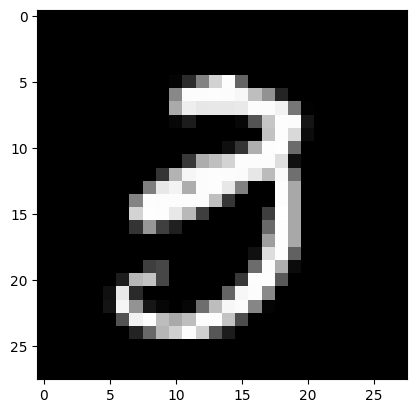

In [112]:
idx = random.randint(0,x_train.shape[0]-1)
img2show , label = x_train[idx] , y_train[idx]
print(img2show.shape)
print(f'number is : {label}')
plt.imshow(img2show , cmap='gray')

#### Flattening Image Data for Neural Network Input

In [113]:
x_train , x_test = x_train.reshape(-1,28*28) , x_test.reshape(-1,28*28)

In [114]:
x_train.shape

(60000, 784)

#### Flattening Image Data for Neural Network Output

In [115]:
y_train , y_test = tf.keras.utils.to_categorical(y_train,10) ,tf.keras.utils.to_categorical(y_test,10) 

In [116]:
y_train.shape

(60000, 10)

#### Normalization data

In [117]:
x_train , x_test = x_train/255.0 , x_test/255.0

#### Define Neural Network Model

In [119]:
model = Sequential()
model.add(Dense(784 , activation='relu' ,input_shape=(784,)))
model.add(Dense(33 , activation='relu'))
model.add(Dense(10 , activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 784)               615440    
                                                                 
 dense_34 (Dense)            (None, 33)                25905     
                                                                 
 dense_35 (Dense)            (None, 10)                340       
                                                                 
Total params: 641685 (2.45 MB)
Trainable params: 641685 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
model.compile(optimizer='SGD' , loss='categorical_crossentropy' , metrics = ['accuracy'] )

#### Training the model

In [131]:
model.fit(x_train , y_train , epochs=30 , batch_size = 33 , validation_data=(x_test,y_test))

Epoch 1/30
1819/1819 [==============================] - 16s 8ms/step - loss: 0.5836 - accuracy: 0.8502 - val_loss: 0.3028 - val_accuracy: 0.9145
Epoch 2/30
1819/1819 [==============================] - 17s 9ms/step - loss: 0.2691 - accuracy: 0.9243 - val_loss: 0.2375 - val_accuracy: 0.9312
Epoch 3/30
1819/1819 [==============================] - 16s 9ms/step - loss: 0.2169 - accuracy: 0.9385 - val_loss: 0.1951 - val_accuracy: 0.9443
Epoch 4/30
1819/1819 [==============================] - 17s 9ms/step - loss: 0.1829 - accuracy: 0.9485 - val_loss: 0.1710 - val_accuracy: 0.9512
Epoch 5/30
1819/1819 [==============================] - 18s 10ms/step - loss: 0.1584 - accuracy: 0.9560 - val_loss: 0.1544 - val_accuracy: 0.9548
Epoch 6/30
1819/1819 [==============================] - 18s 10ms/step - loss: 0.1390 - accuracy: 0.9606 - val_loss: 0.1416 - val_accuracy: 0.9590
Epoch 7/30
1819/1819 [==============================] - 18s 10ms/step - loss: 0.1241 - accuracy: 0.9656 - val_loss: 0.1320 - val

#### Testing a Trained Neural Network Model on a Random Image from the Test Dataset

1/1 [==============================] - 0s 62ms/step
the predicted label is 7 and the true label is 7


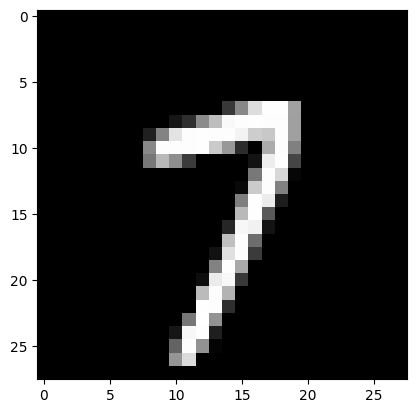

In [149]:
idx_test = random.randint(0,x_test.shape[0]-1)
img_test = x_test[idx_test]
img_test = np.expand_dims(img_test,axis=0)
prediction = model.predict(img_test)
predict_label = np.argmax(prediction)
true_label = y_test[idx_test]
print(f'the predicted label is {predict_label} and the true label is {np.argmax(true_label)}')
plt.imshow(x_test[idx_test].reshape(28,28),cmap='gray')

### Released By AIT KADIR Abdelhak